In [221]:
import numpy as np
import scipy.interpolate as interp
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [240]:
l=np.array(range(4,51))
norm_lg1=[] #Norm for lagrange for f1
norm_lg2=[] #Norm for lagrange for f2
norm_cubic1=[] #Norm for Cubic spline for f1
norm_cubic2=[] #Norm for cubic spline for f2
norm_cheb1=[] #Norm for chebyshev lagrange for f1
norm_cheb2=[] #Norm for chebychev lagrange for f2

In [241]:
def f1(x):
    return (1./(1+25*x**2))

def f2(x):
    result=np.zeros(x.shape)
    for i in range(len(x)):
        result[i]=math.exp(math.cos(x[i]))
    return result

def sample_f1(i):
    sample=np.random.uniform(-1.,1.,i)
    return np.array(sorted(sample))

def sample_f2(i):
    sample=np.random.uniform(0.,2*math.pi,i)
    return np.array(sorted(sample))
    
def cheb_sample(i):
    r=np.array(range(1,i+1))
    result=np.zeros(r.shape)
    for elem in range(len(r)):
        theta = math.pi*(2*r[elem]-1.)/(2.*i)
        result[elem] = math.cos(theta)
    return np.array(sorted(result))


In [242]:
i=12
s1=sample_f1(i)
res1=f1(s1)

#Lagrange interpolation for both f1 and f2
lg1=interp.lagrange(s1,res1) #Lagrange interpolant for f1

eval_lg1=sample_f1(100*i)
approx_lg1=lg1(eval_lg1) #Lagrange interpolant for f1 results

#Cubic spline for f1 and f2
sp1=interp.splrep(s1,res1)

eval_sp1=sample_f1(100*i)
#Evaluate norm for cubic spline
approx_sp1=interp.splev(eval_sp1,sp1) #Spline interpolant for f1 results

#Chebyshev
s1=cheb_sample(i)
res1=f1(s1)

#Chebyshev Lagrange interpolation for both f1 and f2
cb_lg1=interp.lagrange(s1,res1) #Chebyshev Lagrange interpolant for f1

#Evaluate norm for Chebyshev 
eval_cheb1=cheb_sample(100*i)

#Evaluate norm for lagrange 
approx_cb1=cb_lg1(eval_cheb1) # Chebyshev Lagrange interpolant for f1 results

#For evaluation
eval_real1=sample_f1(100*i)
real_res1=f1(eval_real1)

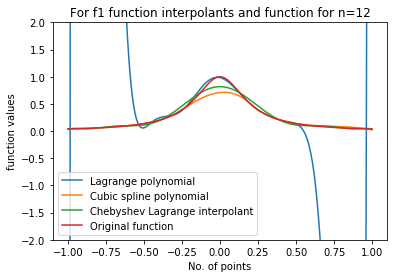

In [243]:
#Plot of error for f1
plt.plot(eval_lg1,approx_lg1, label = 'Lagrange polynomial')
plt.plot(eval_sp1,approx_sp1, label = 'Cubic spline polynomial')
plt.plot(eval_cheb1,approx_cb1, label='Chebyshev Lagrange interpolant')
plt.plot(eval_real1,real_res1, label='Original function')
plt.title('For f1 function interpolants and function for n=12')
plt.xlabel('No. of points')
plt.ylabel('function values')
plt.ylim([-2,2])
plt.legend()
plt.show()
print ('')

In [233]:
for i in l:
    s1=sample_f1(i)
    res1=f1(s1)
    s2=sample_f2(i)
    res2=f2(s2)
    
    #Lagrange interpolation for both f1 and f2
    lg1=interp.lagrange(s1,res1) #Lagrange interpolant for f1
    lg2=interp.lagrange(s2,res2) #Lagrange interpolant for f2
    
    #Cubic spline for f1 and f2
    sp1=interp.splrep(s1,res1,s=0)
    sp2=interp.splrep(s2,res2,s=0)
    
    #Chebyshev
    s1=cheb_sample(i)
    res1=f1(s1)
    s2=cheb_sample(i)
    s2=math.pi*(s2+1.)
    res2=f2(s2)
    
    #Chebyshev Lagrange interpolation for both f1 and f2
    cb_lg1=interp.lagrange(s1,res1) #Chebyshev Lagrange interpolant for f1
    cb_lg2=interp.lagrange(s2,res2) #Chebyshev Lagrange interpolant for f2
      
    #For evaluation
    eval1=sample_f1(10*i)
    real_res1=f1(eval1)
    eval2=sample_f2(10*i)
    real_res2=f2(eval2)
    
    #Evaluate norm for lagrange 
    approx_lg1=lg1(eval1) #Lagrange interpolant for f1 results
    approx_lg2=lg2(eval2) #Lagrange interpolant for f2 results
    norm_lg1.append(np.linalg.norm(real_res1-approx_lg1))
    norm_lg2.append(np.linalg.norm(real_res2-approx_lg2))
    
    #Evaluate norm for cubic spline
    approx_sp1=interp.splev(eval1,sp1) #Spline interpolant for f1 results
    approx_sp2=interp.splev(eval2,sp2) #Spline interpolant for f2 results
    norm_cubic1.append(np.linalg.norm(real_res1-approx_sp1))
    norm_cubic2.append(np.linalg.norm(real_res2-approx_sp2))
    
    #Evaluate norm for Chebyshev 
    eval1=cheb_sample(10*i)
    real_res1=f1(eval1)
    eval2=cheb_sample(10*i)
    real_res2=f2(eval2)
    
    #Evaluate norm for lagrange 
    approx_cb1=cb_lg1(eval1) # Chebyshev Lagrange interpolant for f1 results
    approx_cb2=cb_lg2(eval2) #Chebyshev Lagrange interpolant for f2 results
    norm_cheb1.append(np.linalg.norm(real_res1-approx_cb1))
    norm_cheb2.append(np.linalg.norm(real_res2-approx_cb2))

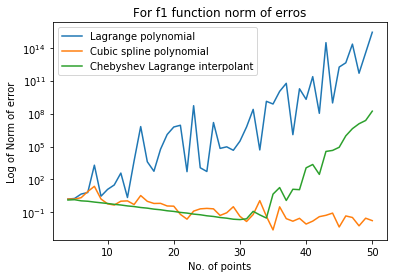

Lagrange polynomial with uniform points is least accurate. For n<30, Chebyshev lagrange polynomial is most accuate, after that, cubic spline is most accurate


In [218]:
#Plot of error for f1
plt.semilogy(l,norm_lg1, label = 'Lagrange polynomial')
plt.semilogy(l,norm_cubic1, label = 'Cubic spline polynomial')
plt.semilogy(l,norm_cheb1, label='Chebyshev Lagrange interpolant')
plt.title('For f1 function norm of erros')
plt.xlabel('No. of points')
plt.ylabel('Log of Norm of error')
plt.legend()
plt.show()
print ('Lagrange polynomial with uniform points is least accurate. For n<30, Chebyshev lagrange polynomial is most accuate, after that, cubic spline is most accurate')

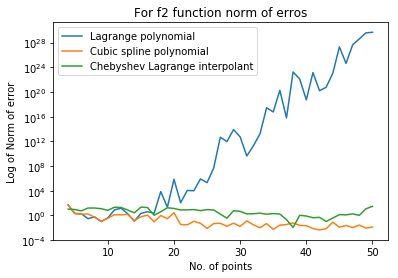

Lagrange polynomial with uniform points is least accurate. Cubic spline is most accurate


In [219]:
#Plot of errors for f2
plt.semilogy(l,norm_lg2, label = 'Lagrange polynomial')
plt.semilogy(l,norm_cubic2, label = 'Cubic spline polynomial')
plt.semilogy(l,norm_cheb2, label='Chebyshev Lagrange interpolant')
plt.title('For f2 function norm of erros')
plt.xlabel('No. of points')
plt.ylabel('Log of Norm of error')
plt.legend()
plt.show()
print ('Lagrange polynomial with uniform points is least accurate. Cubic spline is most accurate')